## Declare Library

In [1]:
import cv2
import numpy as np
import pandas as pd
from string import punctuation
from matplotlib import pyplot as plt

from collections import Counter
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords

import re
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\R4P\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\R4P\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


## Load From Google Drive

In [2]:
# from google.colab import drive
# drive.mount('/content/drive')

url_root = '.'
# Tokopedia - 797450
# Instagram - 568058
appName = 'Instagram'
appId = 568058

## Process Data From Google Drive

In [3]:
url_topic_txt = url_root + '/Topics/' + appName +'/README.txt'
url_topics = url_root + '/Topics'

In [4]:
dict_topics = {}
topics = []

with open(url_topic_txt, 'r') as f:
    for line in f:
      topic, num = line.split('-')
      num = num.replace('\n', '')
      dict_topics[num] = topic
      topics.append(topic)

dict_topics

{'34': 'Satisfied Users',
 '11': 'Bugs',
 '15': 'Design & UX',
 '12': 'Camera & Photos',
 '42': 'Use cases',
 '35': 'Security & Accounts',
 '43': 'Video',
 '19': 'Dissatified Users',
 '31': 'Performance',
 '17': 'Feature Requests'}

In [5]:
all_csv = []
for num_topic, topic in dict_topics.items():
  directory = url_topics + '/' + appName + '/' + str(num_topic)
  print(directory)
  for i in range(1, 50):
    try:
      url_csv = directory + '/AppId'+ str(appId) + 'From2019-05-29To2020-05-29_' + str(i) + '.json.csv'
      with open(url_csv, 'r') as f:
        all_csv.append(url_csv)
    except:
      break

all_csv

./Topics/Instagram/34
./Topics/Instagram/11
./Topics/Instagram/15
./Topics/Instagram/12
./Topics/Instagram/42
./Topics/Instagram/35
./Topics/Instagram/43
./Topics/Instagram/19
./Topics/Instagram/31
./Topics/Instagram/17


['./Topics/Instagram/34/AppId568058From2019-05-29To2020-05-29_1.json.csv',
 './Topics/Instagram/34/AppId568058From2019-05-29To2020-05-29_2.json.csv',
 './Topics/Instagram/34/AppId568058From2019-05-29To2020-05-29_3.json.csv',
 './Topics/Instagram/34/AppId568058From2019-05-29To2020-05-29_4.json.csv',
 './Topics/Instagram/34/AppId568058From2019-05-29To2020-05-29_5.json.csv',
 './Topics/Instagram/34/AppId568058From2019-05-29To2020-05-29_6.json.csv',
 './Topics/Instagram/34/AppId568058From2019-05-29To2020-05-29_7.json.csv',
 './Topics/Instagram/34/AppId568058From2019-05-29To2020-05-29_8.json.csv',
 './Topics/Instagram/34/AppId568058From2019-05-29To2020-05-29_9.json.csv',
 './Topics/Instagram/34/AppId568058From2019-05-29To2020-05-29_10.json.csv',
 './Topics/Instagram/34/AppId568058From2019-05-29To2020-05-29_11.json.csv',
 './Topics/Instagram/34/AppId568058From2019-05-29To2020-05-29_12.json.csv',
 './Topics/Instagram/34/AppId568058From2019-05-29To2020-05-29_13.json.csv',
 './Topics/Instagram/

In [6]:
# combined_csv = pd.concat([pd.read_csv(f, encoding='latin-1') for f in all_csv ])

read_csvs = []
topic = ''
cnt = 0
for url in all_csv:
  df = pd.read_csv(url, encoding='latin-1')
  arr_url = url.split('/')
  temp_topic = dict_topics[str(arr_url[3])]
  if topic != temp_topic:
    if temp_topic == 'Dissatified Users' or temp_topic == 'Satisfied Users':
      topic = 'Satisfication'
    else:
      topic = temp_topic
  df['Topic'] = topic
  read_csvs.append(df)
  cnt += 1
  print('Progress: ' + str(cnt) + '/' + str(len(all_csv)))


Progress: 1/490
Progress: 2/490
Progress: 3/490
Progress: 4/490
Progress: 5/490
Progress: 6/490
Progress: 7/490
Progress: 8/490
Progress: 9/490
Progress: 10/490
Progress: 11/490
Progress: 12/490
Progress: 13/490
Progress: 14/490
Progress: 15/490
Progress: 16/490
Progress: 17/490
Progress: 18/490
Progress: 19/490
Progress: 20/490
Progress: 21/490
Progress: 22/490
Progress: 23/490
Progress: 24/490
Progress: 25/490
Progress: 26/490
Progress: 27/490
Progress: 28/490
Progress: 29/490
Progress: 30/490
Progress: 31/490
Progress: 32/490
Progress: 33/490
Progress: 34/490
Progress: 35/490
Progress: 36/490
Progress: 37/490
Progress: 38/490
Progress: 39/490
Progress: 40/490
Progress: 41/490
Progress: 42/490
Progress: 43/490
Progress: 44/490
Progress: 45/490
Progress: 46/490
Progress: 47/490
Progress: 48/490
Progress: 49/490
Progress: 50/490
Progress: 51/490
Progress: 52/490
Progress: 53/490
Progress: 54/490
Progress: 55/490
Progress: 56/490
Progress: 57/490
Progress: 58/490
Progress: 59/490
Progre

### Merge Satisfied Users and Dissatified Users

In [7]:
new_dict_topics = dict_topics
del new_dict_topics['19']
del new_dict_topics['34']
new_dict_topics['-1'] = 'Satisfication'
print(new_dict_topics)

new_topics = topics
new_topics.remove('Satisfied Users')
new_topics.remove('Dissatified Users')
new_topics.append('Satisfication')
print(new_topics)

{'11': 'Bugs', '15': 'Design & UX', '12': 'Camera & Photos', '42': 'Use cases', '35': 'Security & Accounts', '43': 'Video', '31': 'Performance', '17': 'Feature Requests', '-1': 'Satisfication'}
['Bugs', 'Design & UX', 'Camera & Photos', 'Use cases', 'Security & Accounts', 'Video', 'Performance', 'Feature Requests', 'Satisfication']


In [8]:
combined_csv = pd.concat(read_csvs)
combined_csv = combined_csv.rename(columns={'Sentiment(From Appbot)': 'Sentiment'})
# combined_csv['content'] = combined_csv['content'].apply(lambda x: x.lower())
# combined_csv['content'] = combined_csv['content'].apply(lambda x: ''.join([c for c in x if c not in punctuation]))
combined_csv['Sentiment'] = combined_csv['Sentiment'].map({'neutral': 0, 'negative': 2, 'mixed': 4, 'positive': 6})
combined_csv = combined_csv.reset_index(drop=True)
combined_csv

rating                      time software_type  \
0            5  2020-05-29T23:59:58.000Z   google_play   
1            5  2020-05-29T23:59:56.000Z   google_play   
2            5  2020-05-29T23:59:32.000Z   google_play   
3            5  2020-05-29T23:59:24.000Z   google_play   
4            5  2020-05-29T23:58:29.000Z   google_play   
...        ...                       ...           ...   
386539       5  2019-10-29T20:31:37.000Z   google_play   
386540       1  2019-10-29T20:14:58.000Z   google_play   
386541       4  2019-10-29T20:10:04.000Z   google_play   
386542       3  2019-10-29T20:04:18.000Z   google_play   
386543       5  2019-10-29T20:04:05.000Z   google_play   

                          author  country_id language  \
0                     Jiya Azhar         134       en   
1             Alexander Barahona         160       es   
2              Nicole jakupvique         154       pt   
3               Brad w Bangerter         134       en   
4       izzmierhzieq #sabahanbah         150       en   
...                          ...         ...      ...   
386539            Valentina Broz         160       es   
386540      Atanepes Gochmuradov         134       en   
386541         Alexander Cabello         160       es   
386542           Aniri Contreras         160       es   
386543            Angelise Parks         134       en   

                                                  content  \
0                         This app is awesome. I love it!   
1                            La app es de excelente...???   
2                                     Eu amei o Instagram   
3                                            No thank you   
4                                               Very good   
...                                                   ...   
386539  Ojalá pudiera publicar más fotos en solo un mi...   
386540       Nice app but I cant put a like can you fix ?   
386541  Es increíble pero me gustaría más que ubiera u...   
386542  Me encanta pero me gustaría poder descargar la...   
386543  I love it when you call me senorita I wish I c...   

                                                      url  Sentiment  \
0       https://appbot.co/apps/568058-instagram/review...          6   
1       https://appbot.co/apps/568058-instagram/review...          6   
2       https://appbot.co/apps/568058-instagram/review...          6   
3       https://appbot.co/apps/568058-instagram/review...          4   
4       https://appbot.co/apps/568058-instagram/review...          6   
...                                                   ...        ...   
386539  https://appbot.co/apps/568058-instagram/review...          0   
386540  https://appbot.co/apps/568058-instagram/review...          4   
386541  https://appbot.co/apps/568058-instagram/review...          6   
386542  https://appbot.co/apps/568058-instagram/review...          2   
386543  https://appbot.co/apps/568058-instagram/review...          0   

                   Topic  
0          Satisfication  
1          Satisfication  
2          Satisfication  
3          Satisfication  
4          Satisfication  
...                  ...  
386539  Feature Requests  
386540  Feature Requests  
386541  Feature Requests  
386542  Feature Requests  
386543  Feature Requests  

[386544 rows x 10 columns]

## Language that maybe used

1.   Indonesia
2.   English



In [9]:
import math

def process_df(df, langs):
  df = pd.DataFrame(combined_csv)
  df = df[df.language.isin(langs)]
  df = df[df['content'].apply(lambda content: isinstance(content,str))]
  df.drop(['time', 'software_type', 'author', 'country_id', 'language', 'url'], axis=1, inplace=True)
  df.drop_duplicates(subset=['content', 'Sentiment'], keep="first")
  df = df.reset_index(drop=True)
  return df

### INDONESIA LANGS REVIEWS

In [10]:
langs = ['id']
df_id = process_df(df, langs)

df_id

rating                                            content  Sentiment  \
0           5           Super entre para defender a joel de gali          6   
1           5                      Mksh centang biru nya love ig          6   
2           4  Halo instagram  Saya sudah memperbarui aplikas...          4   
3           5  The best bgt app ini tpi kenapa yah di hpku gk...          6   
4           5                                           Nice app          6   
...       ...                                                ...        ...   
11484       2  instagram saya kok sarannya hanya berisi yang ...          0   
11485       1  Sya udh update ig tpi malah filter ig nya gk b...          2   
11486       5  Waktu komentar atau ngetag foto kenapa gak mun...          4   
11487       3  Kenapa di ig pertama saya tidak bisa menyimpan...          2   
11488       2  update IG yg terbaru, saat create story dan ma...          2   

                  Topic  
0         Satisfication  
1         Satisfication  
2         Satisfication  
3         Satisfication  
4         Satisfication  
...                 ...  
11484  Feature Requests  
11485  Feature Requests  
11486  Feature Requests  
11487  Feature Requests  
11488  Feature Requests  

[11489 rows x 4 columns]

### ENGLISH LANGS REVIEW

In [11]:
langs = ['en']
df_en = process_df(df, langs)

df_en

rating                                            content  Sentiment  \
0            5                    This app is awesome. I love it!          6   
1            5                                       No thank you          4   
2            5                                          Very good          6   
3            4                                          Very nice          6   
4            5                                          Very good          6   
...        ...                                                ...        ...   
183720       5  It serves it purpose by providing Mass Network...          0   
183721       5  You guys should make it so where we can go to ...          6   
183722       1  Make it available to do the same things on PC/...          2   
183723       1       Nice app but I cant put a like can you fix ?          4   
183724       5  I love it when you call me senorita I wish I c...          0   

                   Topic  
0          Satisfication  
1          Satisfication  
2          Satisfication  
3          Satisfication  
4          Satisfication  
...                  ...  
183720  Feature Requests  
183721  Feature Requests  
183722  Feature Requests  
183723  Feature Requests  
183724  Feature Requests  

[183725 rows x 4 columns]

### Use Your Lang

In [12]:
df = df_en

## Visualize Data

In [13]:
def visualize_data(df, title):
  # data to plot
  n_groups = len(topics)
  positive = []
  negative = []
  neutral = []
  mixed = []

  for num_topic, topic in new_dict_topics.items():
    temp_df = df[df.Topic.isin([topic])]
    positive.append(len(temp_df[temp_df.Sentiment.isin([6])]))
    negative.append(len(temp_df[temp_df.Sentiment.isin([2])]))
    neutral.append(len(temp_df[temp_df.Sentiment.isin([0])]))
    mixed.append(len(temp_df[temp_df.Sentiment.isin([4])]))

  positive = tuple(positive)
  negative = tuple(negative)
  neutral = tuple(neutral)
  mixed = tuple(mixed)

  # create plot
  fig, ax = plt.subplots()
  fig.set_figheight(12)
  fig.set_figwidth(20)
  index = np.arange(n_groups)
  bar_width = 0.2
  opacity = 0.8

  plt.bar(index, positive, bar_width,
  alpha=opacity,
  color='blue',
  label='Positive')

  plt.bar(index + bar_width, negative, bar_width,
  alpha=opacity,
  color='red',
  label='Negative')

  plt.bar(index + bar_width * 2, neutral, bar_width,
  alpha=opacity,
  color='gray',
  label='Neutral')

  plt.bar(index + bar_width * 3, mixed, bar_width,
  alpha=opacity,
  color='green',
  label='Mixed')

  plt.xlabel('Topics')
  plt.ylabel('Count')
  plt.title(title)
  plt.xticks(index + bar_width, topics)
  plt.legend()

  plt.tight_layout()
  plt.show()


### Visualize Indonesia Langs Review

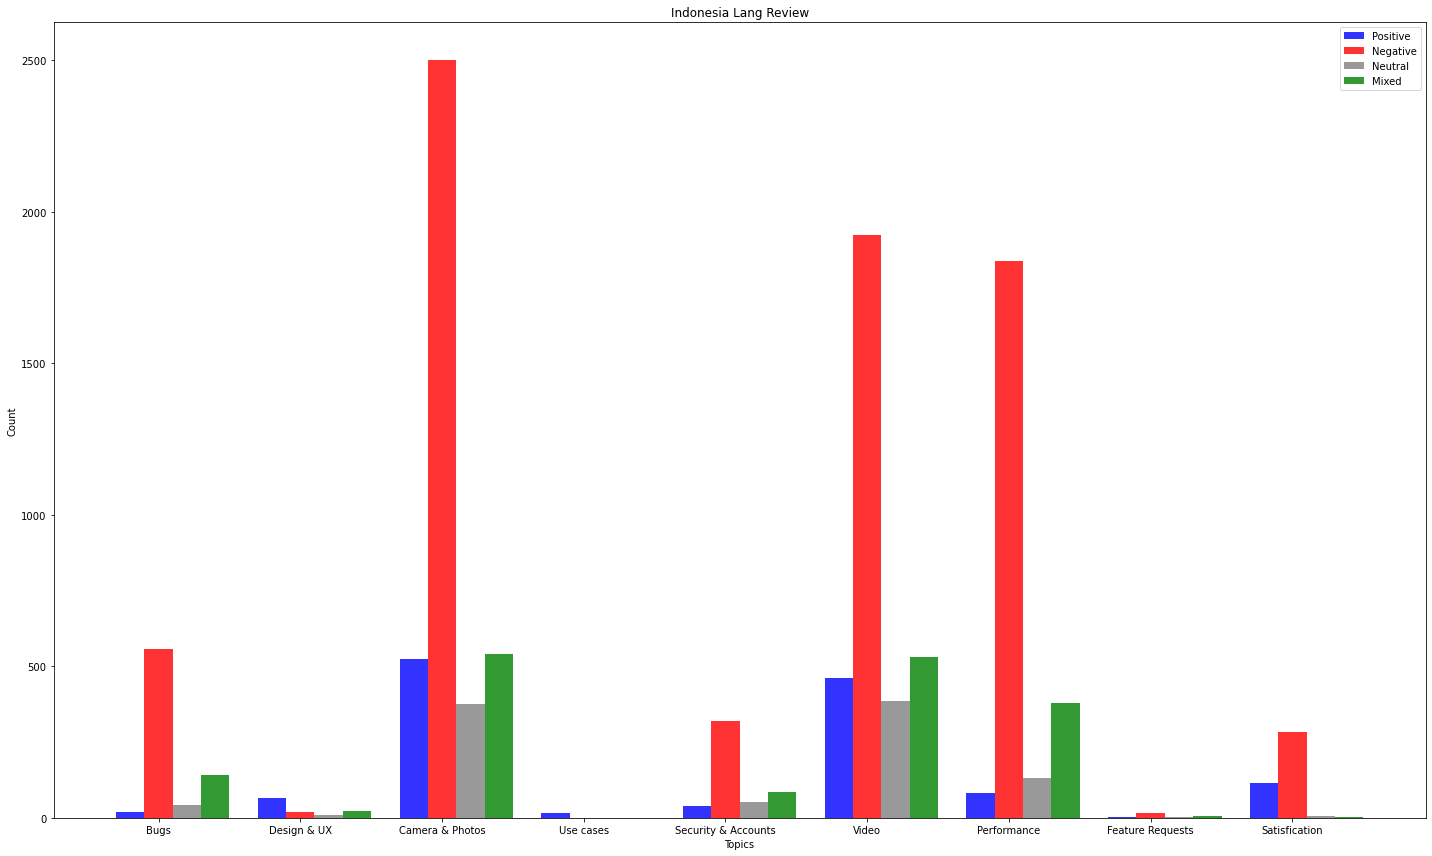

In [14]:
visualize_data(df_id, 'Indonesia Lang Review')

### Visualize English Langs Review

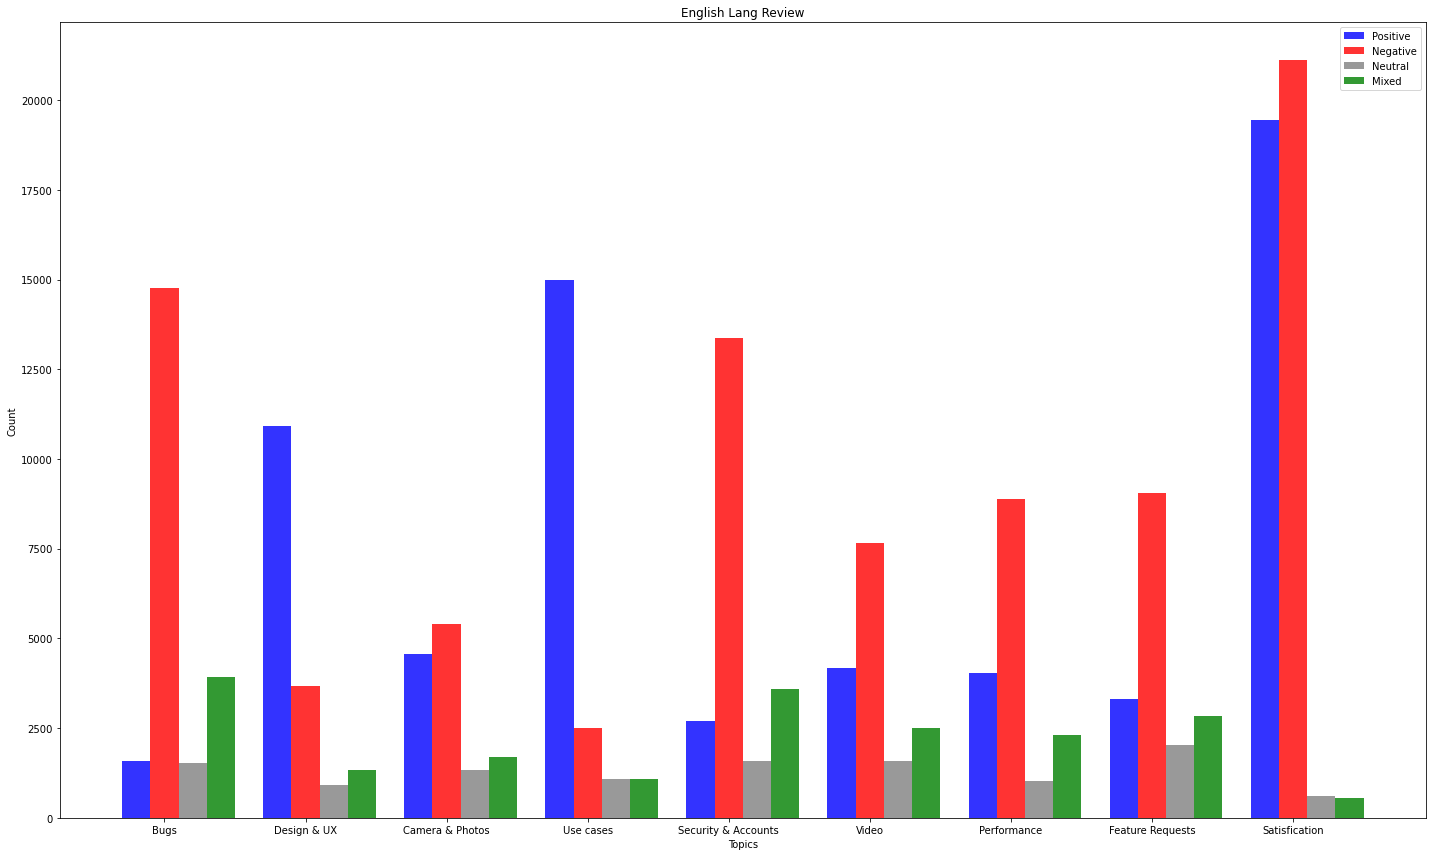

In [15]:
visualize_data(df_en, 'English Lang Review')

## Preprocessing

### WordNet Lemmatizer

In [16]:
stemmer = WordNetLemmatizer()

### Random value X and Y

In [17]:
y_start = np.array(df.Sentiment)
X_start = np.array(df.content)

# Shuffle data
indices = np.arange(len(X_start))
np.random.shuffle(indices)
X_start = X_start[indices]
y_start = y_start[indices]

print("Length of X: " + str(len(X_start)))
print("Length of Y: " + str(len(y_start)))

# Keep 10%
# X = X_start[:int(len(X_start) * 0.9)]
# y = y_start[:int(len(y_start) * 0.9)]
X = X_start
y = y_start

Length of X: 183725
Length of Y: 183725


### Content Before Processed

In [18]:
X[30]

'The app is good i hate that you have to click on the vid to hear the audio and that you cant make the vid fit the full screen but overall i do enjoy the app'

### Process the comment
*   Remove special characters, single characters and multiple spaces
*   Convert to lowercase
*   Using WordNet Lemmatizer to stemming



In [19]:
comments = []

for i in range(len(X)):
  comment = X[i]

  try:
    # remove all single characters
    comment = re.sub(r'\s+[a-zA-Z]\s+', ' ', comment)
  except:
    print("Broken in step 1: " + str(comment))

  try:
    # Substituting multiple spaces with single space
    comment = re.sub(r'\s+', ' ', comment, flags=re.I)
  except:
    print("Broken in step 2: " + str(comment))

  try:
    # Converting to Lowercase
    comment = comment.lower()
  except:
    print("Broken in step 3: " + str(comment))

  try:
    # Lemmatization
    comment = comment.split()

    comment = [stemmer.lemmatize(word) for word in comment]
    comment = ' '.join(comment)
  except: 
    print("Broken in step 4: " + str(comment))

  comments.append(str(comment))

In [20]:
comments[30]

'the app is good hate that you have to click on the vid to hear the audio and that you cant make the vid fit the full screen but overall do enjoy the app'

### Split dataset 
Train (70%) & Development (10%) & Test (20%)

In [21]:
X_train, X_dev, X_test = comments[:int(len(comments) * 0.7)], comments[int(len(comments) * 0.7) + 1:int(len(comments) * 0.8)], comments[int(len(comments) * 0.8) + 1:int(len(comments))]
y_train, y_dev, y_test = y[:int(len(y) * 0.7)], y[int(len(y) * 0.7) + 1:int(len(y) * 0.8)], y[int(len(y) * 0.8) + 1:int(len(y))]

### Download & unzip fasttext word embeddings

In [22]:
!wget https://dl.fbaipublicfiles.com/fasttext/vectors-crawl/cc.en.300.vec.gz
!gzip -d cc.en.300.vec.gz

'wget' is not recognized as an internal or external command,
operable program or batch file.
'gzip' is not recognized as an internal or external command,
operable program or batch file.


### Load fasttext embeddings
To load fasttext pre-trained embeddings more efficiently, we can read only once the embeddings file and save:
* A 2D np-array for the embedding vectors
* A dictionary that maps each word to the row index of its embedding on the 2D np-array

In [23]:
import pickle
idx = 0
vocab = {}
with open("cc.en.300.vec", 'r', encoding="utf-8", newline='\n', errors='ignore') as f:
  for l in f:
    line = l.rstrip().split(' ')
    if idx == 0:
      vocab_size = int(line[0]) + 2
      dim = int(line[1])
      vecs = np.zeros(vocab_size*dim).reshape(vocab_size,dim)
      vocab["__PADDING__"] = 0
      vocab["__UNK__"] = 1
      idx = 2
    else:
      vocab[line[0]] = idx
      emb = np.array(line[1:]).astype(np.float)
      if (emb.shape[0] == dim):
        vecs[idx,:] = emb
        idx+=1
      else:
        continue
  pickle.dump(vocab,open("fasttext_voc",'wb'))
  np.save("fasttext.npy",vecs)

### Load embeddings np-array and mapping dictionary

In [24]:
fasttext_embed = np.load("fasttext.npy")
fasttext_word_to_index = pickle.load(open("fasttext_voc", 'rb'))

In [26]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

MAX_WORDS = 20000
MAX_SEQUENCE_LENGTH = 200
EMBEDDING_DIM = fasttext_embed.shape[1]

tokenizer = Tokenizer(num_words=MAX_WORDS,oov_token='__UNK__')
tokenizer.fit_on_texts(X_train)

train_seqs = tokenizer.texts_to_sequences(X_train)
train_data = pad_sequences(train_seqs, maxlen=MAX_SEQUENCE_LENGTH,padding='post')

dev_seqs = tokenizer.texts_to_sequences(X_dev)
dev_data = pad_sequences(dev_seqs, maxlen=MAX_SEQUENCE_LENGTH, padding='post')

test_seqs = tokenizer.texts_to_sequences(X_test)
test_data = pad_sequences(test_seqs, maxlen=MAX_SEQUENCE_LENGTH,padding='post')

Using TensorFlow backend.
C:\Users\R4P\anaconda3\envs\Sentiment Analysis\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\R4P\anaconda3\envs\Sentiment Analysis\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\R4P\anaconda3\envs\Sentiment Analysis\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\R4P\a

In [27]:
train_data

array([[  19,   22,   58, ...,    0,    0,    0],
       [  90,   21,    2, ...,    0,    0,    0],
       [1215,   30,   68, ...,    0,    0,    0],
       ...,
       [ 108,   41,  196, ...,    0,    0,    0],
       [   5, 1808,   14, ...,    0,    0,    0],
       [   9,    8,  193, ...,    0,    0,    0]])

In [28]:
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

Found 32765 unique tokens.


### Initialize embedding matrix with fasttext pre-trained embedings

In [29]:
embedding_matrix = np.zeros((MAX_WORDS+2, EMBEDDING_DIM))
for word, i in word_index.items():
  if i > MAX_WORDS:
    continue
  try:
    embedding_vector = fasttext_embed[fasttext_word_to_index[word],:]
    embedding_matrix[i] = embedding_vector
  except:
    pass

In [30]:
# model.add(Embedding(MAX_WORDS+2, EMBEDDING_DIM, weights=[embedding_matrix],input_length=MAX_SEQUENCE_LENGTH, mask_zero=True, trainable=False))
# Use train_data, y_train for training, dev_data, y_dev for validation data and test_data, y_test for testing/predic